# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [9]:
!pip install citipy


In [17]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


In [18]:
url= f"http://api.openweathermap.org/data/2.5/weather?"
    
city_url = url + "appid=" + weather_api_key + "&q=" + city
    
city_weather =requests.get(city_url).json()      
print(city_weather)

{'coord': {'lon': -85.8533, 'lat': 38.8245}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 295.19, 'feels_like': 295.96, 'temp_min': 294.23, 'temp_max': 295.68, 'pressure': 1015, 'humidity': 96}, 'visibility': 10000, 'wind': {'speed': 0.89, 'deg': 168, 'gust': 2.68}, 'clouds': {'all': 71}, 'dt': 1689690135, 'sys': {'type': 2, 'id': 2009102, 'country': 'US', 'sunrise': 1689676349, 'sunset': 1689728781}, 'timezone': -14400, 'id': 4263635, 'name': 'Retreat', 'cod': 200}


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | inderbor
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | zuunmod
Processing Record 5 of Set 1 | lazaro cardenas
Processing Record 6 of Set 1 | olonkinbyen
Processing Record 7 of Set 1 | al kharijah
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | shangri-la
City not found. Skipping...
Processing Record 10 of Set 1 | taltal
Processing Record 11 of Set 1 | tazovsky
Processing Record 12 of Set 1 | tamanrasset
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | mandali
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | whitehorse
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | keflavik
Processing Record 19 of Set 1 | nova sintra
Processing Record 20 of Set 1 | benjamin aceval
Processing Record 21 of S

Processing Record 42 of Set 4 | rukungiri
Processing Record 43 of Set 4 | kosh-agach
Processing Record 44 of Set 4 | pisco
Processing Record 45 of Set 4 | st. john's
Processing Record 46 of Set 4 | eastham
Processing Record 47 of Set 4 | bouira
Processing Record 48 of Set 4 | pakruojis
Processing Record 49 of Set 4 | ellsworth
Processing Record 0 of Set 5 | baijiantan
Processing Record 1 of Set 5 | pahrump
Processing Record 2 of Set 5 | isafjordur
Processing Record 3 of Set 5 | mersa matruh
Processing Record 4 of Set 5 | talnakh
Processing Record 5 of Set 5 | aasiaat
Processing Record 6 of Set 5 | uray
Processing Record 7 of Set 5 | avanigadda
Processing Record 8 of Set 5 | arraial do cabo
Processing Record 9 of Set 5 | port lincoln
Processing Record 10 of Set 5 | urengoy
Processing Record 11 of Set 5 | enewetak
Processing Record 12 of Set 5 | moralillo
Processing Record 13 of Set 5 | berdigestyakh
Processing Record 14 of Set 5 | camana
Processing Record 15 of Set 5 | springs
Processin

Processing Record 34 of Set 8 | correntina
Processing Record 35 of Set 8 | lata
Processing Record 36 of Set 8 | novodvinsk
Processing Record 37 of Set 8 | stettler
Processing Record 38 of Set 8 | namie
Processing Record 39 of Set 8 | luanshya
Processing Record 40 of Set 8 | san antonio de pale
Processing Record 41 of Set 8 | thinadhoo
Processing Record 42 of Set 8 | virac
Processing Record 43 of Set 8 | lumberton
Processing Record 44 of Set 8 | saldanha
Processing Record 45 of Set 8 | morehead city
Processing Record 46 of Set 8 | segezha
Processing Record 47 of Set 8 | kalabo
Processing Record 48 of Set 8 | ji parana
City not found. Skipping...
Processing Record 49 of Set 8 | malango
Processing Record 0 of Set 9 | villa regina
Processing Record 1 of Set 9 | baie-comeau
Processing Record 2 of Set 9 | suoyarvi
Processing Record 3 of Set 9 | ichihara
Processing Record 4 of Set 9 | kralendijk
Processing Record 5 of Set 9 | aldan
Processing Record 6 of Set 9 | kimbe
Processing Record 7 of S

Processing Record 20 of Set 12 | babolsar
Processing Record 21 of Set 12 | mossel bay
Processing Record 22 of Set 12 | ba
City not found. Skipping...
Processing Record 23 of Set 12 | riachao
Processing Record 24 of Set 12 | antsiranana
Processing Record 25 of Set 12 | kodinar
Processing Record 26 of Set 12 | isangel
Processing Record 27 of Set 12 | polyarnyy
Processing Record 28 of Set 12 | cortland
Processing Record 29 of Set 12 | winneba
Processing Record 30 of Set 12 | callao
Processing Record 31 of Set 12 | minab
Processing Record 32 of Set 12 | kearneys spring
Processing Record 33 of Set 12 | ulladulla
Processing Record 34 of Set 12 | port moresby
Processing Record 35 of Set 12 | cabedelo
Processing Record 36 of Set 12 | vingt cinq
City not found. Skipping...
Processing Record 37 of Set 12 | la gi
Processing Record 38 of Set 12 | haizhou
Processing Record 39 of Set 12 | renk
City not found. Skipping...
Processing Record 40 of Set 12 | posto fiscal rolim de moura
Processing Record 

In [21]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,inderbor,48.5500,51.7833,25.09,45,100,6.27,KZ,1689690307
1,adamstown,-25.0660,-130.1015,20.97,78,96,3.12,PN,1689690307
2,zuunmod,47.7069,106.9528,17.57,89,100,2.56,MN,1689690308
3,lazaro cardenas,17.9583,-102.2000,27.43,74,100,1.90,MX,1689690308
4,olonkinbyen,70.9221,-8.7187,4.50,90,47,8.75,SJ,1689690308


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,inderbor,48.5500,51.7833,25.09,45,100,6.27,KZ,1689690307
1,adamstown,-25.0660,-130.1015,20.97,78,96,3.12,PN,1689690307
2,zuunmod,47.7069,106.9528,17.57,89,100,2.56,MN,1689690308
3,lazaro cardenas,17.9583,-102.2000,27.43,74,100,1.90,MX,1689690308
4,olonkinbyen,70.9221,-8.7187,4.50,90,47,8.75,SJ,1689690308


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

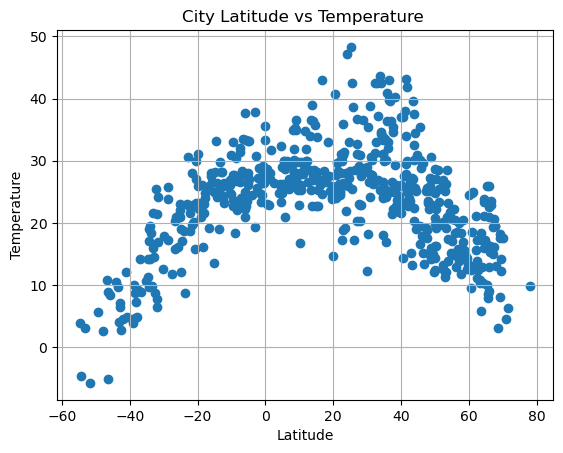

In [28]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title(f"City Latitude vs Temperature ")
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig1.png")
# Show plot
plt.show()

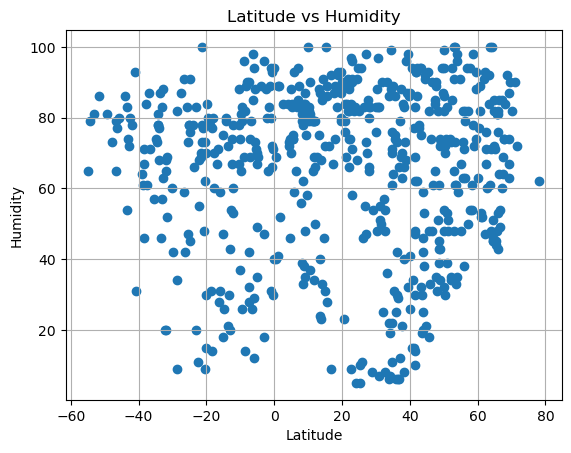

In [29]:
#### Latitude Vs. Humidity

x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f"Latitude vs Humidity")
plt.savefig("../output_data/Fig2.png")
plt.grid()
plt.show()

#### Latitude Vs. Cloudiness

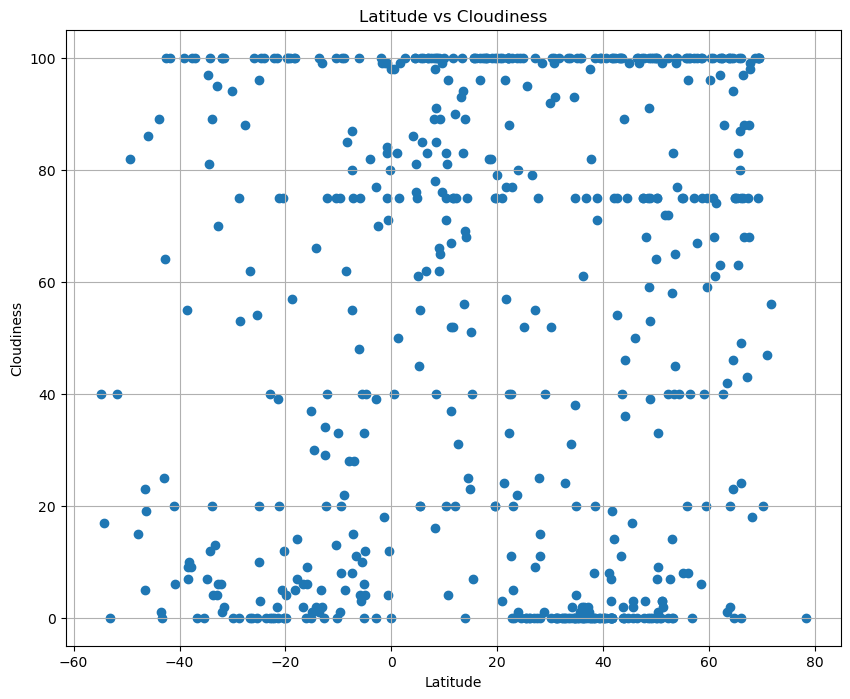

In [33]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Latitude vs Cloudiness')
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

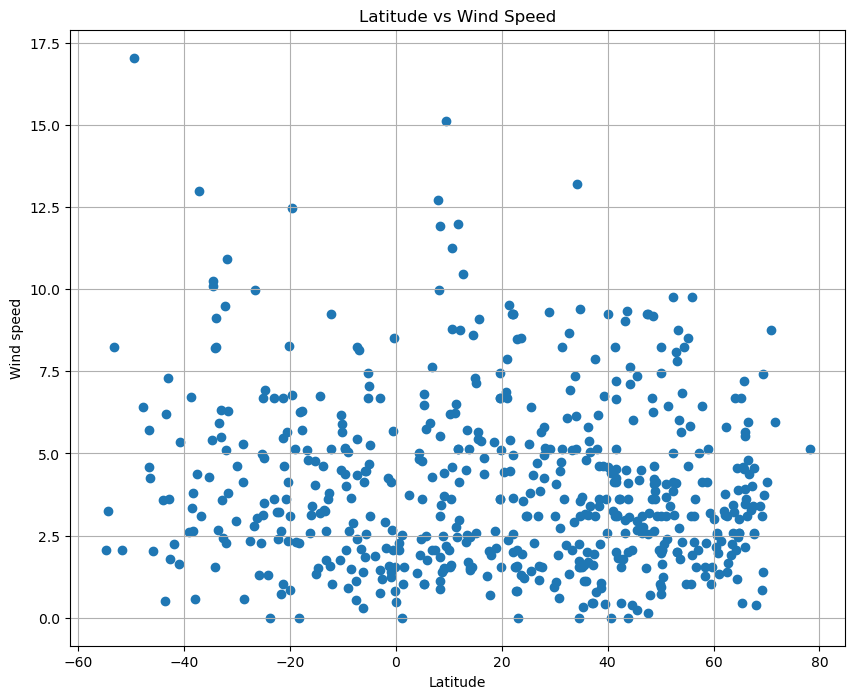

In [36]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind speed')
plt.title(f'Latitude vs Wind Speed')
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is -0.1


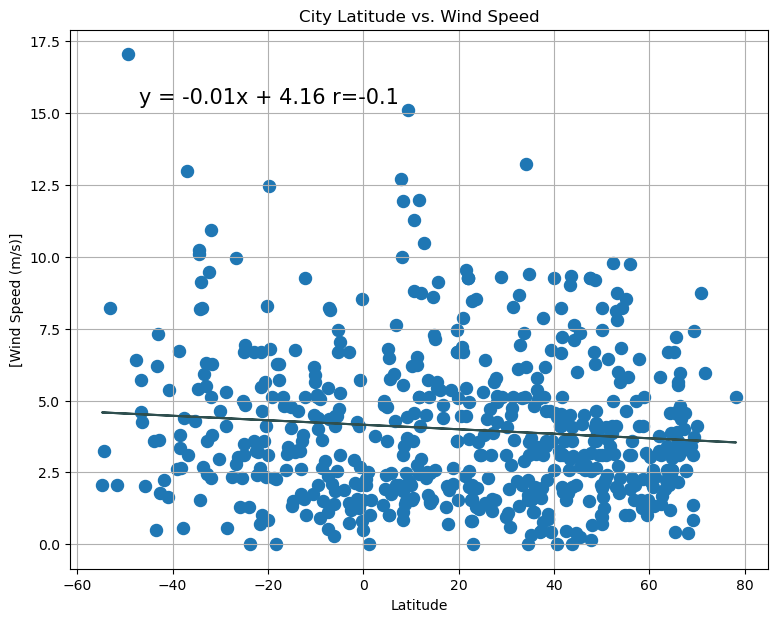

In [43]:
#
df = city_data_df
datasetID = 'TestFunction'
xparam = 'Lat'
yparam = 'Wind Speed'
yunits = '(m/s)'

def LRPlots():
    xdata = df[xparam]
    ydata = df[yparam]

    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.figure(figsize = (9,7))
    plt.scatter(xdata, ydata, marker="o",s =75)

    # plt.xlim(-55,85)
    # plt.ylim(0,105)
    annotatex = min(xdata)+0.1*max(xdata)
    annotatey = max(ydata)-0.1*max(ydata)

    plt.plot(xdata,regress_values,"darkslategray")
    plt.annotate(f'{line_eq} r={round(rvalue,2)}',(annotatex,annotatey),fontsize=15,color="black")
    

    plt.title(f"City Latitude vs. {yparam}")
    plt.xlabel("Latitude")
    plt.ylabel(f"[{yparam} {yunits}]")
    plt.grid()


    
    print(f'The r-value is {round(rvalue,2)}')

   

    # Save the figure
    figname = f'{datasetID}_{xparam}_vs_{yparam}'
    
    plt.savefig(f"../output_data/{figname}.png")

    # Show plot
    plt.show()

LRPlots()

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,inderbor,48.5500,51.7833,25.09,45,100,6.27,KZ,1689690307
2,zuunmod,47.7069,106.9528,17.57,89,100,2.56,MN,1689690308
3,lazaro cardenas,17.9583,-102.2000,27.43,74,100,1.90,MX,1689690308
4,olonkinbyen,70.9221,-8.7187,4.50,90,47,8.75,SJ,1689690308
5,al kharijah,25.4514,30.5464,42.47,10,0,6.41,EG,1689690309


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,20.97,78,96,3.12,PN,1689690307
6,grytviken,-54.2811,-36.5092,-4.71,79,17,3.25,GS,1689690309
7,taltal,-25.4000,-70.4833,21.26,47,54,2.29,CL,1689690309
12,edinburgh of the seven seas,-37.0676,-12.3116,14.22,87,100,13.00,SH,1689690310
17,benjamin aceval,-24.9667,-57.5667,12.08,45,10,3.50,PY,1689690311


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.56


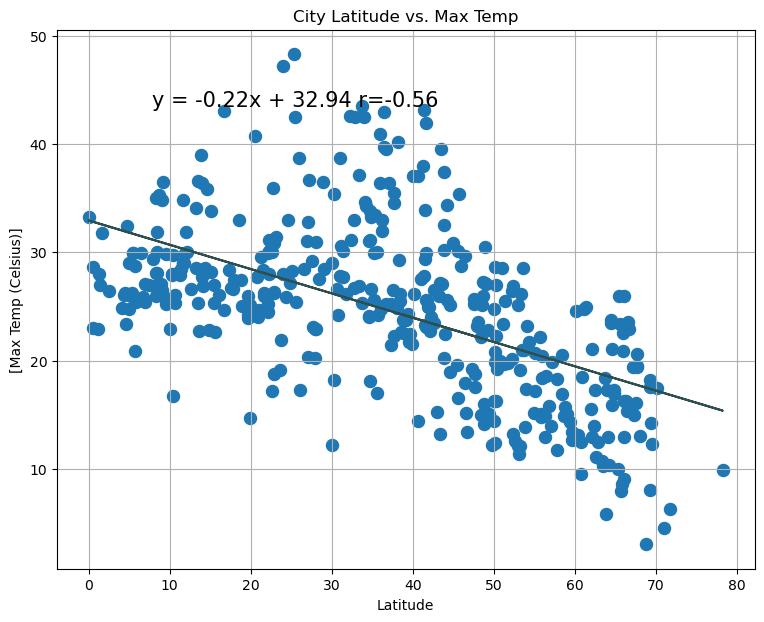

In [46]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
df = northern_hemi_df
datasetID = 'North'
xparam = 'Lat'
yparam = 'Max Temp'
yunits = '(Celsius)'

LRPlots()


The r-value is 0.84


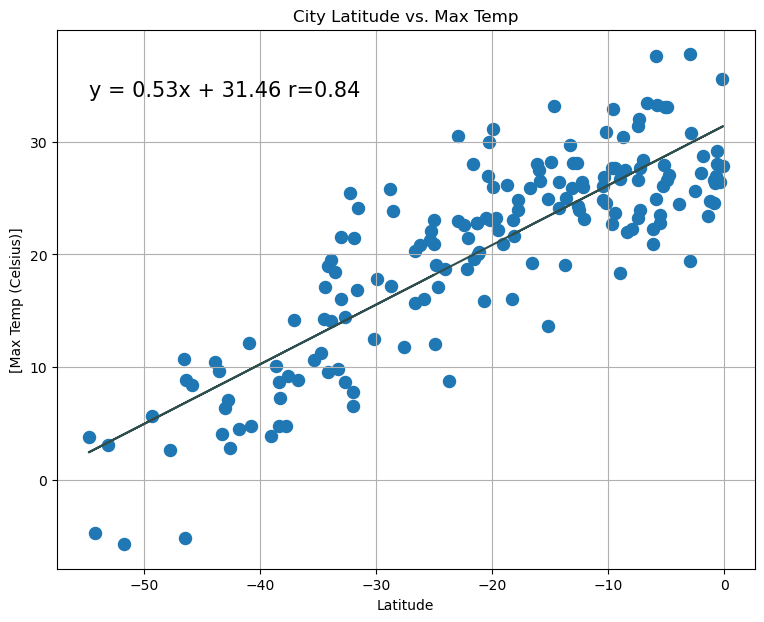

In [47]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
df = southern_hemi_df
datasetID = 'South'
xparam = 'Lat'
yparam = 'Max Temp'
yunits = '(Celsius)'

LRPlots()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In the Northern Hemisphere there is a moderate negative correlation between Latitude and Max Temperature(r=-0.56). for the Southern Hemisphere there is avery strong positive correlation between the Max temperature and Latitude(r=0.84).

### Humidity vs. Latitude Linear Regression Plot

The r-value is -0.02


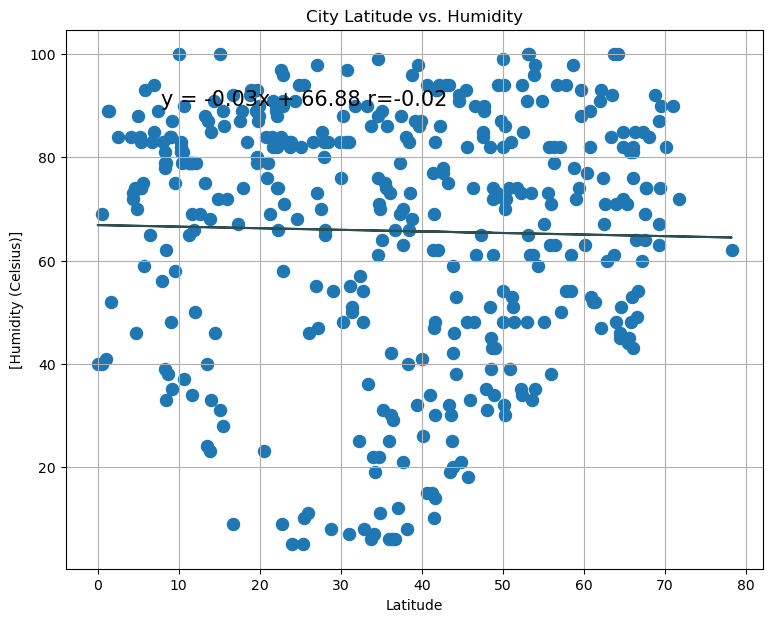

In [48]:
# Northern Hemisphere
# YOUR CODE HERE
df = northern_hemi_df
datasetID = 'North'
xparam = 'Lat'
yparam = 'Humidity'
yunits = '(Celsius)'

LRPlots()


The r-value is -0.09


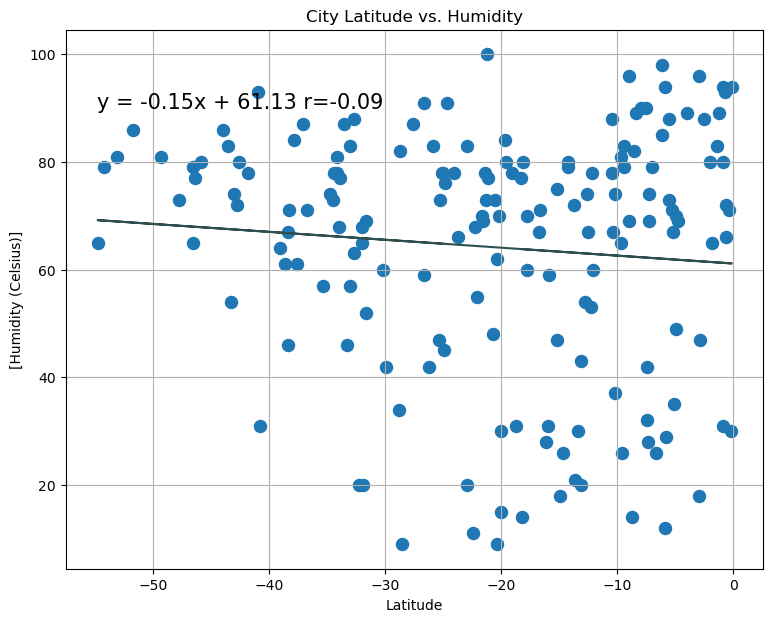

In [51]:
# Southern Hemisphere
# YOUR CODE HERE

df = southern_hemi_df
datasetID = 'South'
xparam = 'Lat'
yparam = 'Humidity'
yunits = '(Celsius)'

LRPlots()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
In the northern hemisphere The r-value is -0.02

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.04400663976424629


NameError: name 'st' is not defined

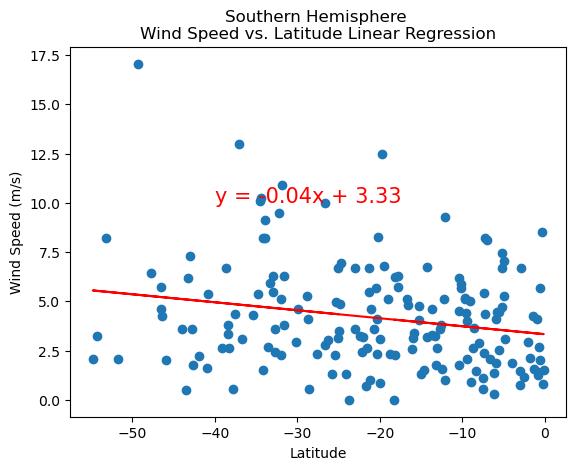

In [58]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = pd.to_numeric(southern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_hemi_df["Wind Speed"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = -40,10
    
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Wind Speed (m/s)")
    plt.title("Southern Hemisphere \nWind Speed vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.show()
    
plotlinearregression(x_values, y_values, "Wind Speed")
plt.savefig("Images/Southern_Hemisphere_Wind_Speed_vs_lat.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE